In [10]:
import pandas as pd
import pickle
import datetime as DT
from operator import mul
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set_style("white")
#!pip install scikit-learn
from sklearn.preprocessing import minmax_scale

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Convert time to minutes

From: https://stackoverflow.com/questions/48447123/convert-time-hhmmss-to-minutes-in-python/48447482 

In [2]:
#Function to convert time to minutes
def convert_to_minutes(my_time):
  factors = (60, 1, 1/60)

  t1 = sum(i*j for i, j in zip(map(int, my_time.split(':')), factors))
  return t1

# Analysis Function

Reads in a specific year of results, returns a pandas dataframe of finisher data (including minutes elapsed)

In [3]:
### Finds a specific year of results, removes non-finishers, calculates time in minutes ###
def analyze_year(year):
  #Read in files
  fp = "/content/gdrive/Shared drives/ELIFE/People/Malloy, John/Random/Black Canyon/BC" + str(year) + "_100k.p"
  df = pickle.load(open(fp, "rb"))

  #Drop the "Did not finish" line
  df = df.drop(df.loc[df["State"] == "Did"].index[0])

  #Create a minutes field to sum up every time - contingent upon convert_to_minutes() function
  df["Minutes"] = df["Time"].apply(convert_to_minutes)
  
  return df[df["Minutes"] > 0]

In [4]:
### Finds the percentiles of each finisher using the np.floor function to round all percentiles down ###
def find_percentiles(year):
  #Find specific data for a specific year, filter out non-finishers
  df = analyze_year(year)

  #Find percentiles, round down for each one (using np.floor)
  percentiles = df["Minutes"].apply(lambda x: stats.percentileofscore(df["Minutes"], x))
  df["Percentiles"] = percentiles
  df["Percentiles"] = df["Percentiles"].apply(np.floor)
  
  #print(df)
  return df

# Function testing

Testing functions to ensure correct performance

In [ ]:
find_percentiles(2021)

    State Age Gender   GP      Time   Rank      Minutes  Percentiles
0      AZ  31      M    2   8:10:54  92.07   490.900000          0.0
1      AZ  33      M    3   8:16:23  84.48   496.383333          0.0
2      WY  28      M    4   8:34:49  90.15   514.816667          0.0
3      MN  26      M    5   8:36:28  87.77   516.466667          1.0
4      CA  36      M    6   8:36:37  97.15   516.616667          1.0
..    ...  ..    ...  ...       ...    ...          ...          ...
359    UT  43      F   99  19:52:48  69.05  1192.800000         98.0
360    CA  44      M  263  19:54:24   50.3  1194.400000         99.0
361    AZ  46      M  264  19:56:47  58.66  1196.783333         99.0
389    CA  60      F    0  20:09:38  62.78  1209.633333         99.0
409    CA  53      F    0  20:13:41  59.95  1213.683333        100.0

[364 rows x 8 columns]


,State,Age,Gender,GP,Time,Rank,Minutes,Percentiles
0,AZ,31,M,2,8:10:54,92.07,490.900000,0.0
1,AZ,33,M,3,8:16:23,84.48,496.383333,0.0
2,WY,28,M,4,8:34:49,90.15,514.816667,0.0
3,MN,26,M,5,8:36:28,87.77,516.466667,1.0
4,CA,36,M,6,8:36:37,97.15,516.616667,1.0
...,...,...,...,...,...,...,...,...
359,UT,43,F,99,19:52:48,69.05,1192.800000,98.0
360,CA,44,M,263,19:54:24,50.3,1194.400000,99.0
361,AZ,46,M,264,19:56:47,58.66,1196.783333,99.0
389,CA,60,F,0,20:09:38,62.78,1209.633333,99.0


#Plotting

IndexError: ignored

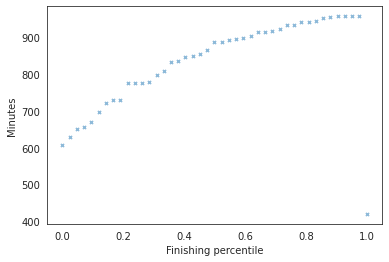

In [ ]:
#Distribution of minutes across all finishers (normalized based on the number of finishers)
fig = plt.figure()
for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]:
  df = analyze_year(year)
  
  plt.scatter(x=np.linspace(0,1,len(df)), y=df["Minutes"], label=str(year) + " BC 100k", alpha=0.5, s=10, marker='x')
  plt.xlabel("Finishing percentile")
  plt.ylabel("Minutes")
# plt.gca().spines("top").set_visible(False)
# plt.gca().spines("right").set_visible(False)
plt.legend()
plt.show()

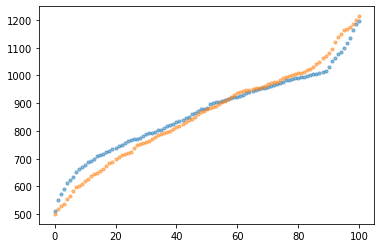

In [ ]:
# Percentile distribution of finishers, average minutes for each percentile on y-axis
fig = plt.figure()
for year in [2020, 2021]:
  df = find_percentiles(year)
  #Find average number of minutes for each percentile (only relevant to this graph)
  df = df.groupby("Percentiles", as_index=False)["Minutes"].mean()
  plt.scatter(x=df["Percentiles"], y=df["Minutes"], alpha=0.5, s=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

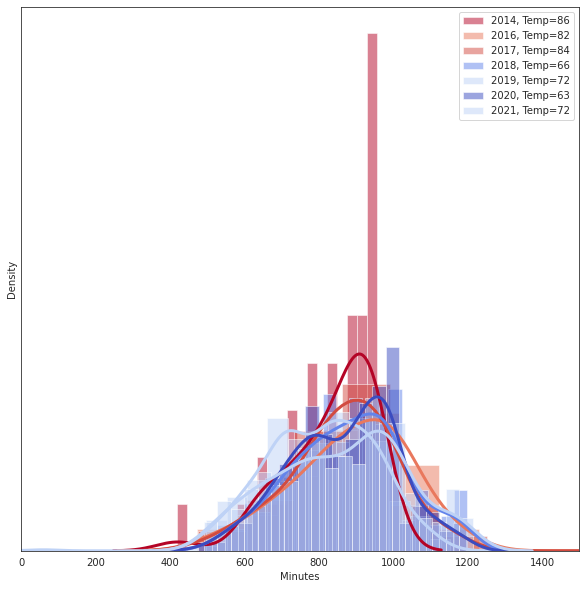

In [24]:
#Histogram of finishers in each percentile
fig = plt.figure(figsize=(10,10))

#Set colors to normalized temperature values 
years = [2014, 2016, 2017, 2018, 2019, 2020, 2021]
temps = [86, 82, 84, 66, 72, 63, 72, 72] #temperatures from timeanddate.com/weather/@5285131
normalized_temps = minmax_scale(list(temps))
colors = dict(zip(years, normalized_temps))
temperatures = dict(zip(years, temps))

for year in years:
  df = find_percentiles(year)
  #df["Minutes"].hist(alpha=0.7, label=year, grid=False, bins=30, stacked=True, density=True)
  kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':3})
  sns.distplot(df["Minutes"], **kwargs, bins=20, label=str(year) + ", Temp=" + str(temperatures[year]), norm_hist=True, color = plt.cm.coolwarm(colors[year]))
  
  #Play around with y-axes values - currently set to invisible
  plt.yticks([])


plt.xlabel("Minutes")
plt.ylabel("Density")
plt.xlim(0, 1500)
plt.legend()